In [1]:
#Import some of the tools I know I will need:
import numpy as np
import pandas as pd
import requests
import zipfile
import io
from datetime import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats


%matplotlib inline

## Part 1a: Explore and prepare data

In [2]:
csv_file = '/Users/torrie/DataFilesForGitProjects/breast_cancer_data.csv'
data_df = pd.read_csv(csv_file)
data_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M       15.780         17.89          103.60      781.0   
12     846226         M       19.170         24.80          132.40     1123.0   
13     846381         M       15.850         23.95          103.70      782.7   
14   84667401         M       13.730         22.61           93.60      578.3   
15   84799002         M       14.540         27.54           96.73      658.8   
16     848406         M       14.680         20.13           94.74      684.5   
17   84862001         M       16.130         20.68          108.10      798.8   
18     849014         M       19.810         22.15          130.00     1260.0   
19    8510426         B       13.540         14.36           87.46      566.3   
20    8510653         B       13.080         15.71           85.63      520.0   
21    8510824         B        9.504         12.44           60.34      273.9   
22    8511133         M       15.340         14.26          102.50      704.4   
23     851509         M       21.160         23.04          137.20     1404.0   
24     852552         M       16.650         21.38          110.00      904.6   
25     852631         M       17.140         16.40          116.00      912.7   
26     852763         M       14.580         21.53           97.41      644.8   
27     852781         M       18.610         20.25          122.10     1094.0   
28     852973         M       15.300         25.27          102.40      732.4   
29     853201         M       17.570         15.05          115.00      955.1   
..        ...       ...          ...           ...             ...        ...   
539    921362         B        7.691         25.44           48.34      170.4   
540    921385         B       11.540         14.44           74.65      402.9   
541    921386         B       14.470         24.99           95.81      656.4   
542    921644         B       14.740         25.42           94.70      668.6   
543    922296         B       13.210         28.06           84.88      538.4   
544    922297         B       13.870         20.70           89.77      584.8   
545    922576         B       13.620         23.23           87.19      573.2   
546    922577         B       10.320         16.35           65.31      324.9   
547    922840         B       10.260         16.58           65.85      320.8   
548    923169         B        9.683         19.34           61.05      285.7   
549    923465         B       10.820         24.21           68.89      361.6   
550    923748         B       10.860         21.48           68.51      360.5   
551    923780         B       11.130         22.44           71.49      378.4   
552    924084         B       12.770         29.43           81.35      507.9   
553    924342         B        9.333         21.94           59.01      264.0   
554    924632         B       12.880         28.92           82.50      514.3   
555    924934         B       10.290         27.61           65.67      321.4   
556    924964         B       10.160      

In [3]:
data_df.shape

(569, 33)

In [4]:
data_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data_df = data_df.drop(['Unnamed: 32'], axis =1) 

In [6]:
data_df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
data_df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean           ...             radius_worst  texture_worst  \
count     569.000000           ...               569.000000     569.000000   
mean        0.181162           ...                16.269190      25.677223   
std         0.027414           ...                 4.833242       6.146258   
min         0.106000           ...                 7.930000      12.020000   
25%         0.161900           ...                13.010000      21.080000   
50%         0.179200           ...                14.970000      25.410000   
75%         0.195700           ...                18.790000      29.720000   
max         0.304000           ...                36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500  

[8 rows x 31 columns]

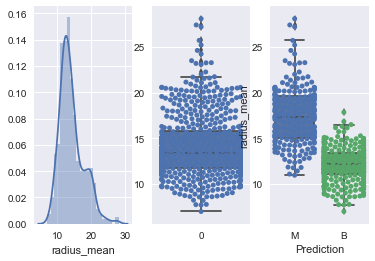

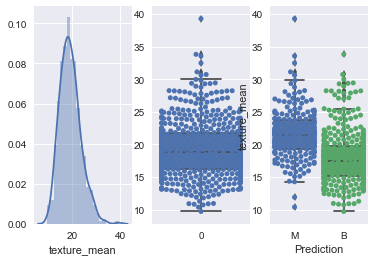

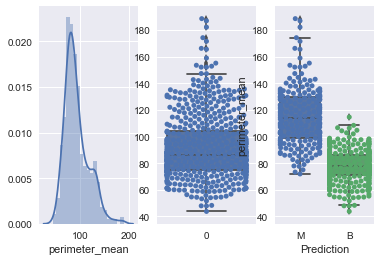

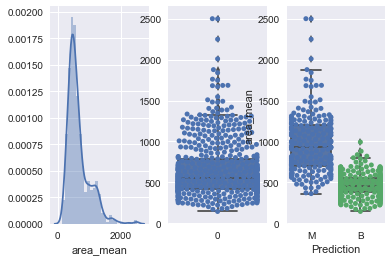

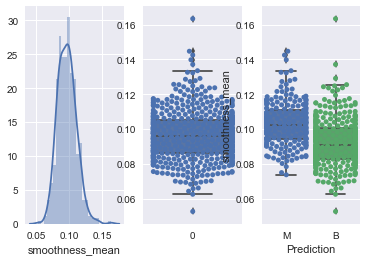

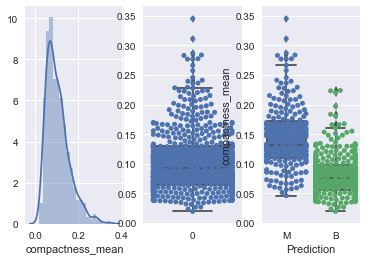

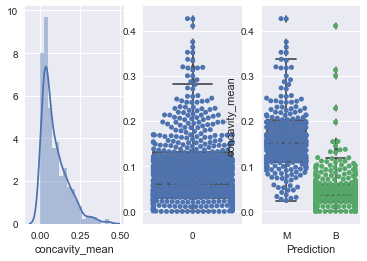

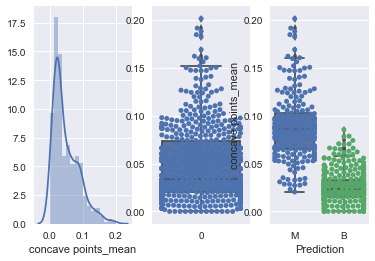

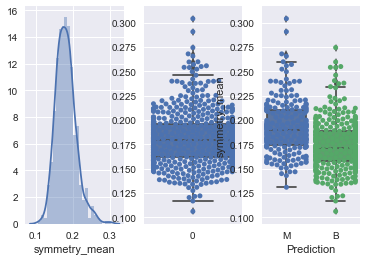

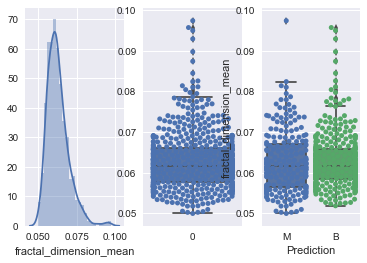

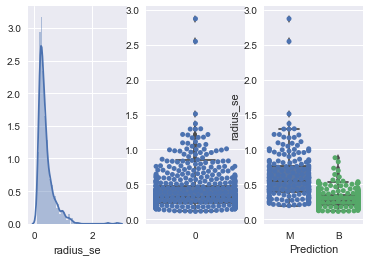

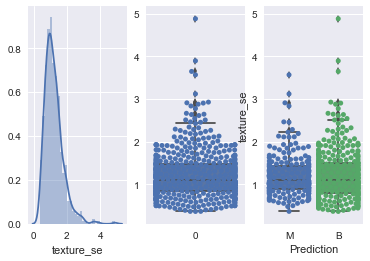

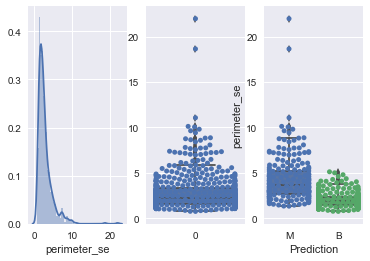

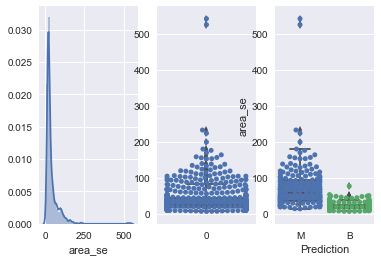

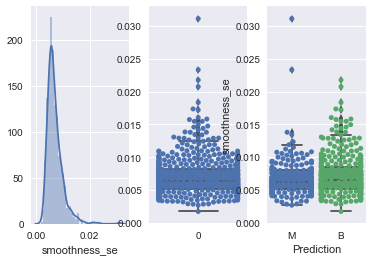

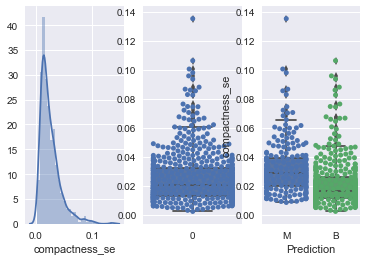

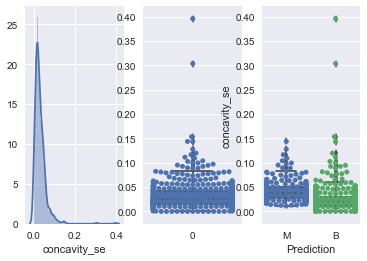

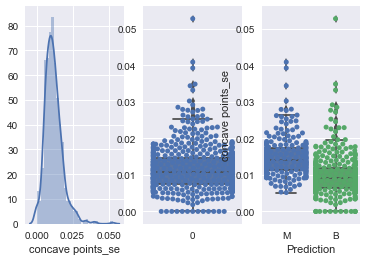

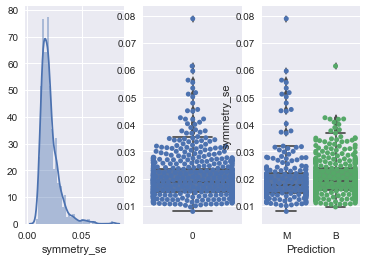

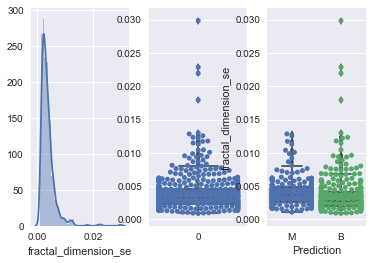

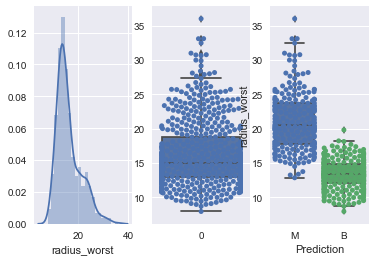

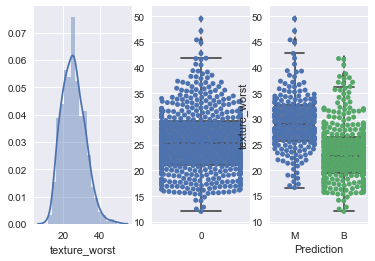

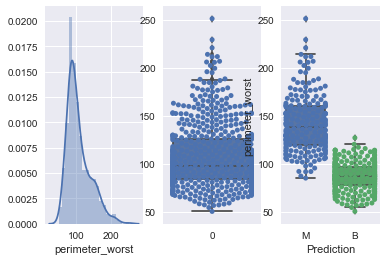

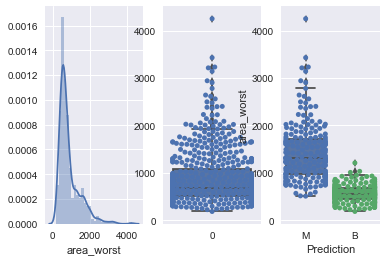

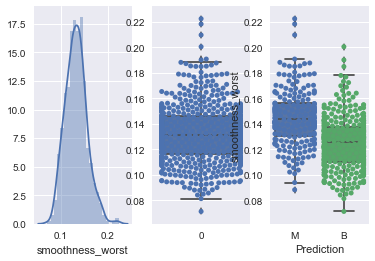

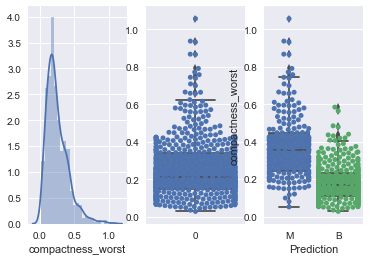

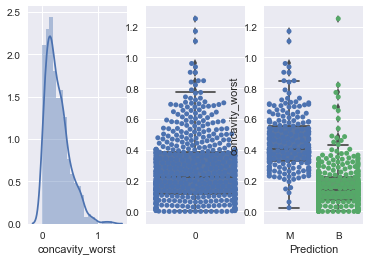

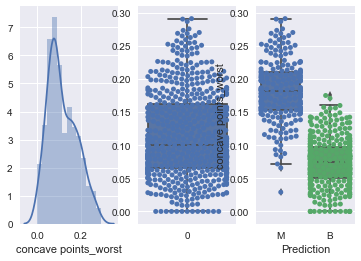

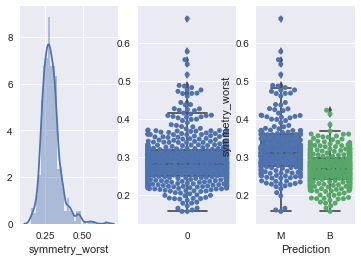

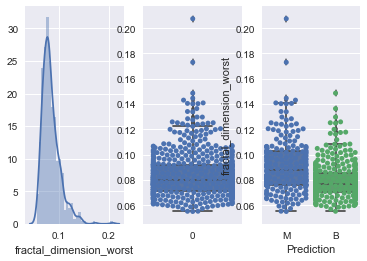

In [39]:
df1 = data_df.select_dtypes([np.int, np.float])
df1 = df1.drop('id', axis =1)
for i,col in enumerate(df1.columns):
    
    data_box = pd.DataFrame(columns=[col, 'Prediction'])
    data_box[col] = data_df[col]
    data_box['Prediction'] = data_df['diagnosis']
    
    fig, axs = plt.subplots(ncols=3)
    sns.distplot(data_df[col], kde='True',ax=axs[0])
    #sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
    sns.boxplot(data=data_box[col], ax=axs[1])
    sns.swarmplot(data=data_box[col], ax=axs[1])
    sns.boxplot(y=col, x="Prediction", data=data_box, ax=axs[2])
    sns.swarmplot(y=col, x="Prediction", data=data_box, ax=axs[2])



In this case, the data is actually quite clean. Some of the features are not distributed normally (more log-normal), and there are some outliers but they seem to still be within reason.  I will create a df with all the outlier dropped, but at this time I see no reason to do the analysis with dropped data.

To find the outliers in the dataframe I find the quartile values and calculate the IQR (the distance between 25% and 75%). The Tukey boxplot calls any data point outside the region of 1.5IQR less than the lower quartile (25%) or greater than 1.5IQR greater than the upper quartile (75%) an outlier. The seaborn plot uses these criteria, so that is what I would use it for analysis.

In [8]:
def drop_outliers(df, group_by = None):
    df_sans_outliers = df.copy()
    drop_list = []
    if group_by == None:
        for item in df_sans_outliers.select_dtypes([np.int, np.float]).columns:
            median = np.median(df_sans_outliers[item])
            upper_quartile = np.percentile(df_sans_outliers[item], 75)
            lower_quartile = np.percentile(df_sans_outliers[item], 25)
            IQR = 1.5*(upper_quartile - lower_quartile)
            upper_IQR = upper_quartile + IQR
            lower_IQR = lower_quartile - IQR
            drop_low = df_sans_outliers[(df_sans_outliers[item]< lower_IQR)].index.tolist()
            drop_list.extend(drop_low) 
            drop_high = df_sans_outliers[(df_sans_outliers[item]> upper_IQR)].index.tolist()
            drop_list.extend(drop_high) 
    else:   
        group_values = df_sans_outliers[group_by].unique()
        for item in df_sans_outliers.drop(group_by, axis = 1).select_dtypes([np.int, np.float]).columns:
            for group in group_values:
                median = np.median(df_sans_outliers[item][df_sans_outliers[group_by] == group])
                upper_quartile = np.percentile((df_sans_outliers[item][df_sans_outliers[group_by] == group]), 75)
                lower_quartile = np.percentile((df_sans_outliers[item][df_sans_outliers[group_by] == group]), 25)
                IQR = 1.5*(upper_quartile - lower_quartile)
                upper_IQR = upper_quartile + IQR
                lower_IQR = lower_quartile - IQR
                drop_low = df_sans_outliers[df_sans_outliers[item] < lower_IQR].index.tolist()
                drop_high = df_sans_outliers[df_sans_outliers[item] > upper_IQR].index.tolist()
                drop_list.extend(drop_low) 
                drop_list.extend(drop_high) 
    drop_list = set(drop_list)   
    
    return drop_list




In [9]:
drop_list = drop_outliers(data_df.drop('id', axis =1), 'diagnosis')   
print(len(drop_list))



424


In [10]:
drop_list = drop_outliers(data_df.drop('id', axis =1))   
print(len(drop_list))


171


In [11]:
print(data_df.shape)
data_df_out = data_df.drop(drop_list, axis = 0).reset_index().drop('index', axis = 1)
print(data_df_out.shape)
#data_df_out.head()

(569, 32)
(398, 32)


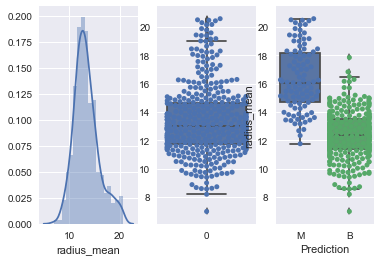

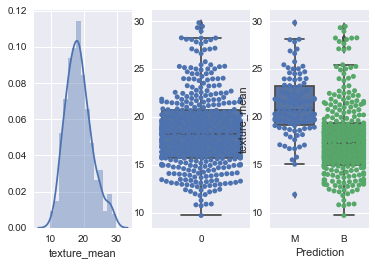

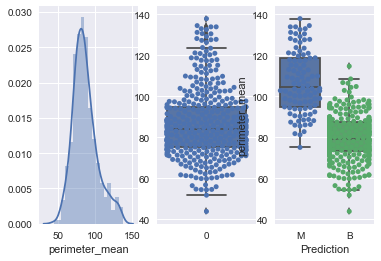

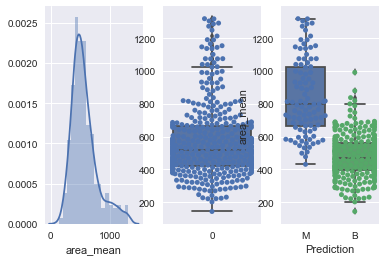

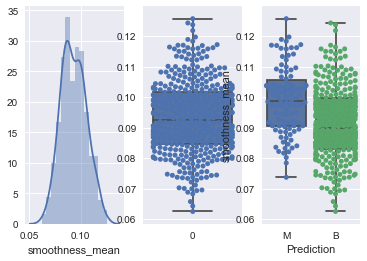

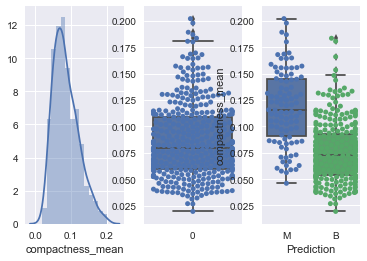

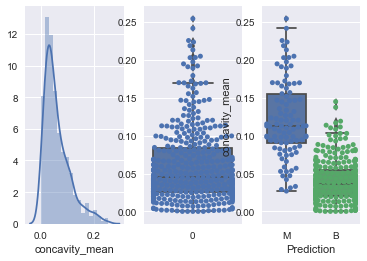

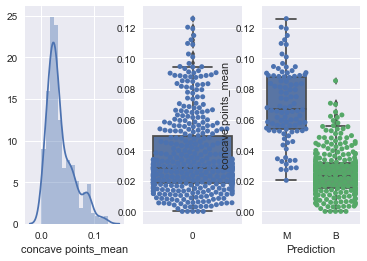

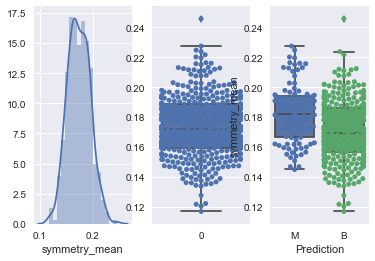

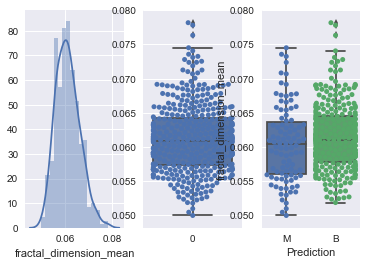

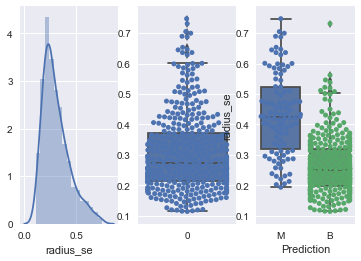

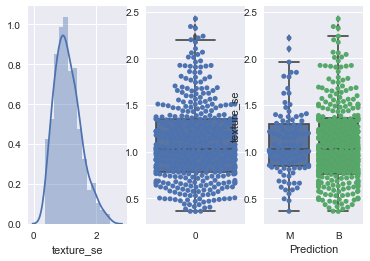

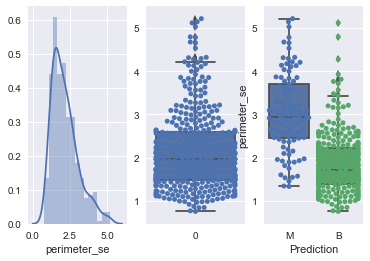

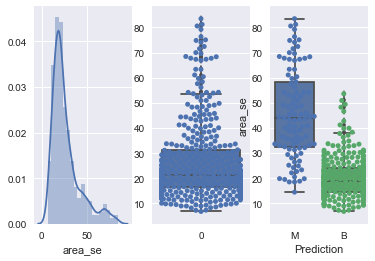

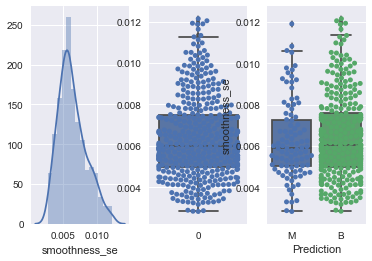

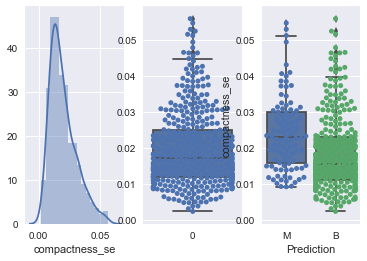

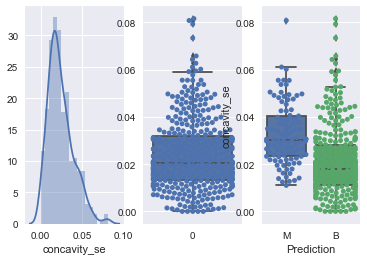

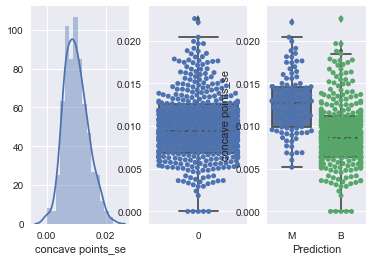

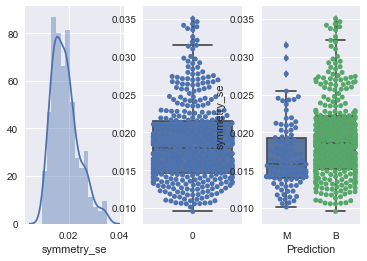

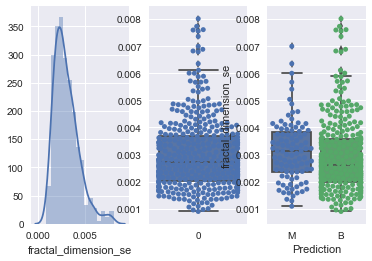

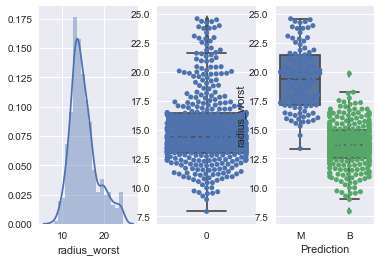

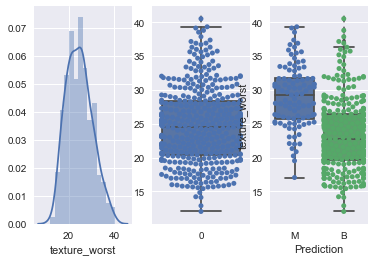

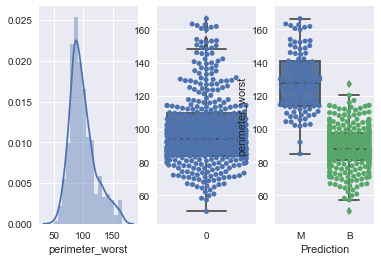

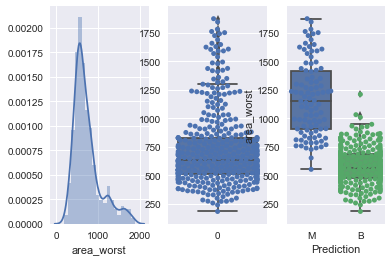

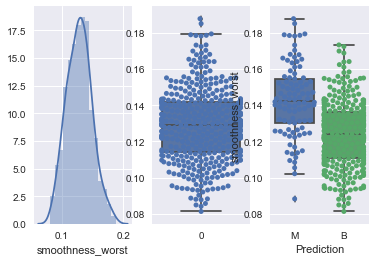

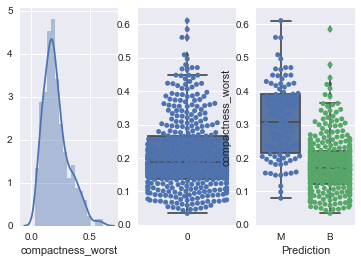

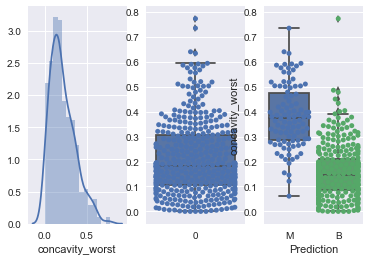

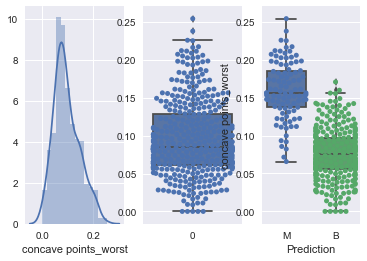

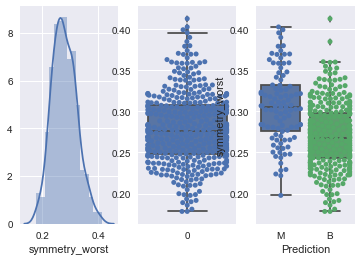

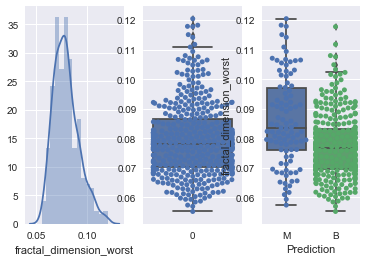

In [151]:
df1 = data_df_out.select_dtypes([np.int, np.float])
df1 = df1.drop('id', axis =1)
for i,col in enumerate(df1.columns):
    #print(col)
    data_box = pd.DataFrame(columns=[col, 'Prediction'])
    data_box[col] = data_df_out[col]
    data_box['Prediction'] = data_df_out['diagnosis']
    fig, axs = plt.subplots(ncols=3)
    sns.distplot(data_df_out[col], kde='True',ax=axs[0])
    #print(data_box[col])
    sns.boxplot(data=data_box[col], ax=axs[1])
    sns.swarmplot(data=data_box[col], ax=axs[1])
    sns.boxplot(y=col, x="Prediction", data=data_box, ax=axs[2])
    sns.swarmplot(y=col, x="Prediction", data=data_box, ax=axs[2])



## Part 1b: Feature Engineering

There are several types of measurements in this dataset. 

## Part 2: Check models

Since this is disease prediction, we want to minimize the number of times a subject who has cancer is predicted to not have cancer, i.e., the false negative rate (Type II error). 

|                     | Benign  |  Malignant  |
| --------------------|---------|-------------|
|Predicted Benign     | TP      |    FN       | 
|Predicted Malignant  | FP      |    TN       |

We could try to maxmimize our sensitivity/recall:
TP/(TP+FN), becasue as FN decreases, recall will be pushed closer to a value of 1. 


A couple of thoughts: 
Feature engineering: Looks like there are several dimensional features (diameter, perimeter, mean, max, etc.). These should all be somewhat related/correlated. Check this and think of ways to combine/eliminate features. 
Models to try:
logisitic regression
KNN
SVM
Tree ensembles
Deep learning (what should I try here? Anything worthwhile?)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Scale data for the models that use a distance metric, i.e. kNN, etc. 
X = data_df.drop(['id', 'diagnosis'], axis = 1)
X_scaled = preprocessing.scale(X)
y = data_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.35, random_state = 3)


In [13]:
#In case dataset needs to be converted to numbers rather than letters

def num_convert(dataset, convert_to_one):
    new_dataset = []
    for value in dataset:
        if value == convert_to_one:
            new_dataset.append(1)
        else:
            new_dataset.append(0)
    return new_dataset


def feature_importance_plot(feature_matrix, importances):
    features = feature_matrix.columns
    y_pos = np.arange(len(features))
    check = type(importances) is np.ndarray
    if check == True:
        importances = importances[0]
    else:
        importances
        
    fig = plt.figure(figsize = (15,10))
    plt.bar(y_pos, importances)
    plt.xticks(y_pos, features, rotation = 'vertical', size = 20)
    plt.ylabel('Coefficients', size = 20)
    plt.title('Feature Importance', size = 20)
    
def plot_roc(y_true, y_pred):
    #calculate FPR, TPR, thresholds from the true test classes and the predicted classes
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    #Then plot
    fig = plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic', size = 20)
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right', prop={'size':16})
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate', size = 20)
    plt.xlabel('False Positive Rate', size = 20)
    plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    
    precision = float(cm[0,0])/float((cm[0,0])+float(cm[0,1]))
    specificity = float(cm[1,1])/(float(cm[1,1])+float(cm[0,1]))
    recall = float(cm[0,0])/(float(cm[0,0])+float(cm[1,0]))
    accuracy = (float(cm[0,0])+float(cm[1,1]))/(float(cm[0,0])+float(cm[1,0])+float(cm[0,1])+float(cm[1,1]))
    
    print("Precision =:", "%.4f" % precision)
    print("Specificity =:", "%.4f" % specificity)
    print("Recall =:", "%.4f" % recall)
    print("Accuracy =:", "%.4f" % accuracy)
    plt.show()
    



### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegressionCV

logregcv = LogisticRegressionCV(cv = 3, random_state = 3)
logregcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=3,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [16]:
train_cv = logregcv.score(X_train, y_train)
print(train_cv)
test_cv = logregcv.score(X_test, y_test)
print(test_cv)

0.986449864499
0.985


('Classes =', array(['B', 'M'], dtype=object))
('Scores = ', {'M': array([[ 0.62601626,  0.82926829,  0.96747967,  0.99186992,  1.        ,
         0.97560976,  0.94308943,  0.93495935,  0.93495935,  0.93495935],
       [ 0.61788618,  0.82113821,  0.89430894,  0.93495935,  0.93495935,
         0.93495935,  0.94308943,  0.94308943,  0.95121951,  0.95121951],
       [ 0.61788618,  0.82113821,  0.92682927,  0.96747967,  0.97560976,
         0.96747967,  0.95121951,  0.95121951,  0.93495935,  0.93495935]])})


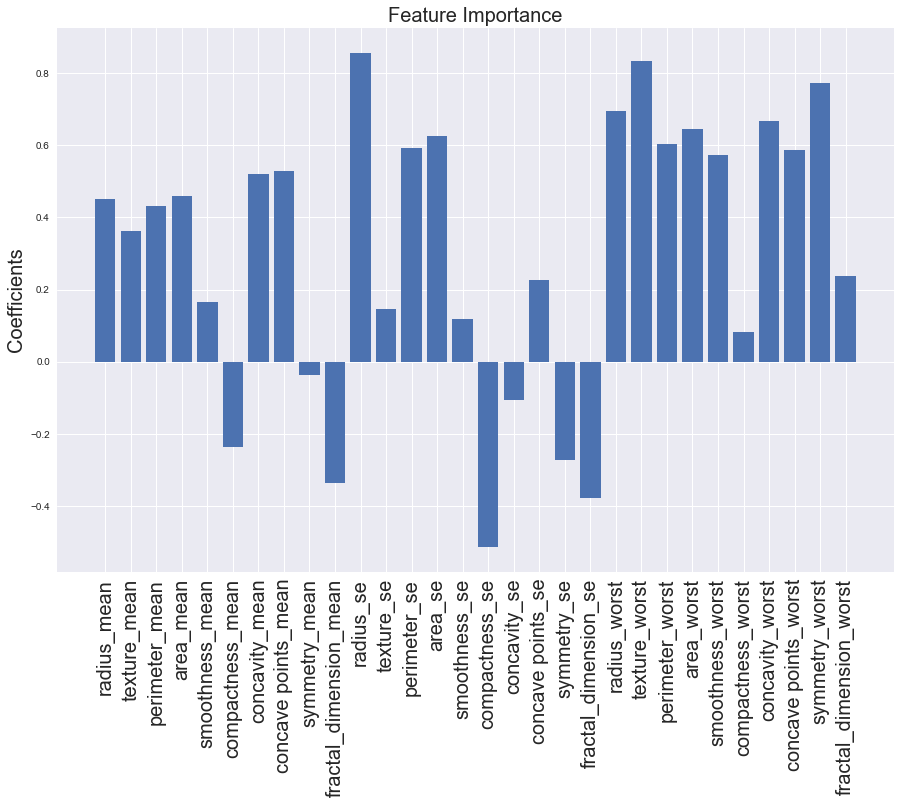

In [17]:
print("Classes =", logregcv.classes_)

# C is the inverse regularization strength
#print("C =", logregcv.C_)

# The intercept is a constant 
#print("Intercept =", logregcv.intercept_)

# Coefficient of the features in the decision function 
#print("Coefficients = ", logregcv.coef_)

#  Values as the grid of scores obtained during cross-validating each fold
print("Scores = ", logregcv.scores_)

# This multiplies the coefficient by the standard deviation of the 
# corresponding parameter in the data to get a feel for its influence
importance = (np.std(X_train, 0)*logregcv.coef_)

#Plots the coefficients of each feature. In this case I'm plotting the coeff*the standard deviation. 
feature_importance_plot(X, importance)


Confusion matrix, without normalization
[[128   1]
 [  2  69]]
('Precision =:', '0.9922')
('Specificity =:', '0.9857')
('Recall =:', '0.9846')
('Accuracy =:', '0.9850')


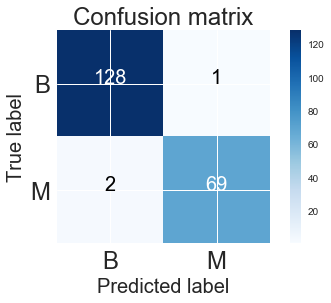

In [18]:
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, logregcv.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

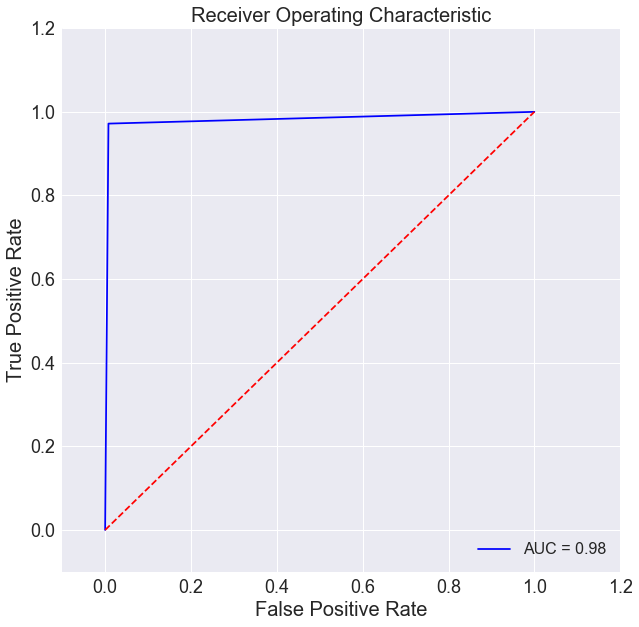

In [19]:
from sklearn.metrics import roc_curve, auc
y_true = num_convert(y_test, 'M')
y_pred = num_convert(logregcv.predict(X_test), 'M')

plot_roc(y_true, y_pred)

### kNN

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

param_grid = {'n_neighbors': range(1, 31),
              'weights': ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'p':[1,2]}

rand = RandomizedSearchCV(KNeighborsClassifier(), 
                          param_grid, 
                          cv=4, 
                          scoring='accuracy',
                          n_iter=10,
                         random_state = 3)

rand = rand.fit(X_train, y_train)

rand.cv_results_['mean_test_score']

print(rand.best_estimator_, rand.best_score_)

print(accuracy_score(y_test, rand.best_estimator_.predict(X_test)))

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance'), 0.95934959349593496)
0.975


Confusion matrix, without normalization
[[127   2]
 [  3  68]]
('Precision =:', '0.9845')
('Specificity =:', '0.9714')
('Recall =:', '0.9769')
('Accuracy =:', '0.9750')


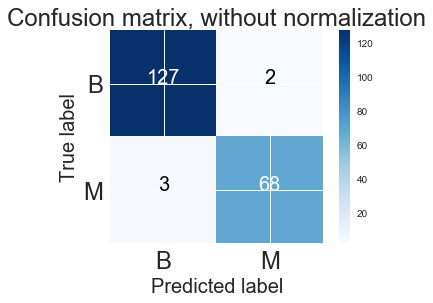

In [27]:
# Compute confusion matrix
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, rand.best_estimator_.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

No feature importance or ROC curve for a kNN model.

## SVM

In [33]:
from sklearn import svm
from sklearn.metrics import recall_score
labels = ['B', 'M']
accuracy = 0
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    accuracy_n = accuracy_score(y_test, clf.predict(X_test))
    print(clf.get_params())
    print(accuracy_n)
    if accuracy_n > accuracy:
        accuracy = accuracy_n
        model = clf
    else:
        continue
                                

{'kernel': 'linear', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
0.985
{'kernel': 'rbf', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
0.98
{'kernel': 'poly', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
0.915


Looks like the best estimator was actually a linear kernel (98.5%!). 

Confusion matrix, without normalization
[[128   1]
 [  2  69]]
('Precision =:', '0.9922')
('Specificity =:', '0.9857')
('Recall =:', '0.9846')
('Accuracy =:', '0.9850')


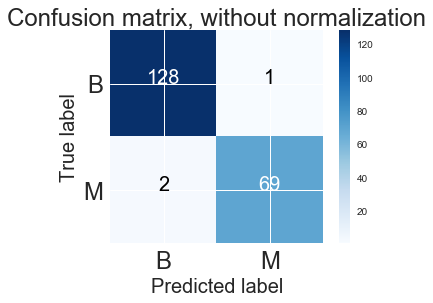

In [35]:
# Compute confusion matrix
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

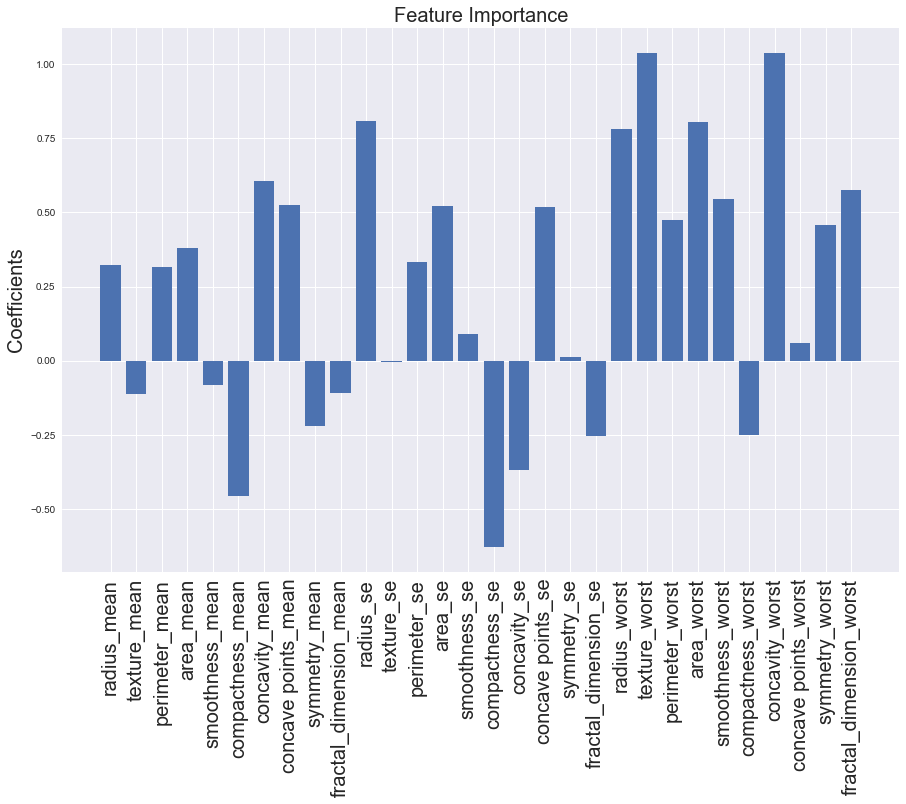

In [39]:

#importance = (np.std(X_train, 0)*model.coef_)
importance = model.coef_

feature_importance_plot(X, importance)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm

def svc_param_selection(X_train, y_train, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    k=['rbf', 'linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : k}
    grid_search = RandomizedSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(X, y, 4)

## Decision Tree

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0)
d_tree = clf.fit(X_train, y_train)
print(d_tree)
print(accuracy_score(y_test, clf.predict(X_test)))



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
0.945


Confusion matrix, without normalization
[[125   4]
 [  7  64]]
('Precision =:', '0.9690')
('Specificity =:', '0.9412')
('Recall =:', '0.9470')
('Accuracy =:', '0.9450')


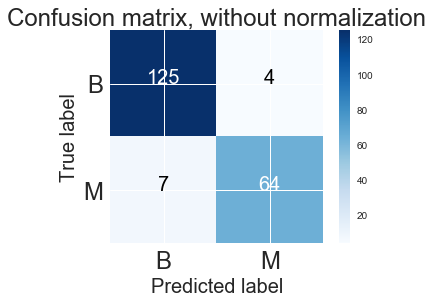

In [34]:
# Compute confusion matrix
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def DecTree_param_selection_Grid(X_train, y_train, nfolds):
    param_grid = {'min_samples_split': [2,4,6], 
                  'min_samples_leaf' : [1,2,4],
                  'max_features' : [5,8,10,12,len(X.columns)],
                  'max_depth' : [5,10,None]}
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid= param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_, accuracy_score(y_test, clf.predict(X_test)), grid_search

best_model, score, grid_search = DecTree_param_selection_Grid(X_train, y_train, 4)
print(score)
print(best_model)
print(best_model)

0.945
{'max_features': 5, 'min_samples_split': 2, 'max_depth': 10, 'min_samples_leaf': 4}


Next step: How do I get the feature importance for the models?

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

def DecTree_param_selection_Rand(X_train, y_train, nfolds):
    n_iter_search = 20
    #sp_randint generates random integers in the range specified. In thos case it will generate a number
    #in that range n_iter times
    param_grid = {'min_samples_split': sp_randint(2, 11), 
                  'min_samples_leaf' : sp_randint(1, 11),
                  'max_features' : sp_randint(1, len(X.columns)),
                  'max_depth' : [5,10,None]}
    grid_search = RandomizedSearchCV(DecisionTreeClassifier(random_state = 0), param_grid,
                               cv=nfolds, n_iter = n_iter_search)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_, accuracy_score(y_test, clf.predict(X_test)), grid_search

best_model, score, grid_search = DecTree_param_selection_Rand(X_train, y_train, 4)
print(score)
print(best_model)

0.945
{'max_features': 13, 'min_samples_split': 4, 'max_depth': 10, 'min_samples_leaf': 5}


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state = 0)
d_rf = clf.fit(X_train, y_train)
print(d_rf)
print(accuracy_score(y_test, clf.predict(X_test)))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
0.965


Confusion matrix, without normalization
[[126   3]
 [  4  67]]
('Precision =:', '0.9767')
('Specificity =:', '0.9571')
('Recall =:', '0.9692')
('Accuracy =:', '0.9650')


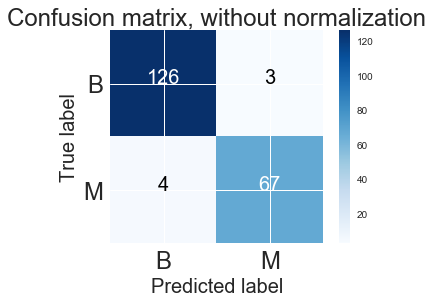

In [36]:
# Compute confusion matrix
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## Neural Net

In [38]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state = 0, alpha = 1)
d_nn = clf.fit(X_train, y_train)
print(d_nn)

print(accuracy_score(y_test, clf.predict(X_test)))


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
0.985


Confusion matrix, without normalization
[[128   1]
 [  2  69]]
('Precision =:', '0.9922')
('Specificity =:', '0.9857')
('Recall =:', '0.9846')
('Accuracy =:', '0.9850')


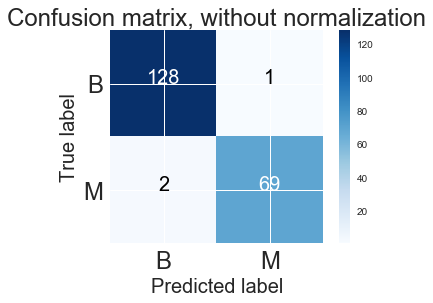

In [39]:
# Compute confusion matrix
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

## AdaBoost 

In [40]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 0)
d_ada = clf.fit(X_train, y_train)
print(d_ada)

print(accuracy_score(y_test, clf.predict(X_test)))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)
0.965


Confusion matrix, without normalization
[[125   4]
 [  3  68]]
('Precision =:', '0.9690')
('Specificity =:', '0.9444')
('Recall =:', '0.9766')
('Accuracy =:', '0.9650')


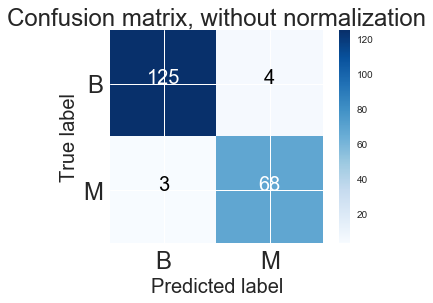

In [41]:
# Compute confusion matrix
class_names = ['B', 'M']
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')